In [1]:
%load_ext autoreload
%autoreload 2

import torch
import torchvision
import torch.nn.functional as F
from torch import nn
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('..')

from src.beam import beam_arguments, Experiment
from src.beam import UniversalDataset, UniversalBatchSampler
from src.beam import Algorithm
from src.beam import LinearNet

from src.beam import DataTensor
from src.beam.utils import is_notebook
from sklearn.manifold import TSNE

from deep_tsne_example import DeepTSNE, MNISTDataset, get_deep_tsne_parser

2022-07-18 22:59:11 | INFO | Deleting old experiment
2022-07-18 22:59:11 | INFO | Experiment directory is: /localdata/elads/data/resutls/deep_tsne_mnist/DeepTSNE/topk_local_global_no_reg/0000_20220718_225911
2022-07-18 22:59:11 | INFO | beam project: deep_tsne_mnist
2022-07-18 22:59:11 | INFO | Experiment Hyperparameters
2022-07-18 22:59:11 | INFO | project_name: deep_tsne_mnist
2022-07-18 22:59:11 | INFO | algorithm: DeepTSNE
2022-07-18 22:59:11 | INFO | identifier: topk_local_global_no_reg
2022-07-18 22:59:11 | INFO | mp_port: random
2022-07-18 22:59:11 | INFO | root_dir: /localdata/elads/data/resutls
2022-07-18 22:59:11 | INFO | reload: False
2022-07-18 22:59:11 | INFO | resume: -1
2022-07-18 22:59:11 | INFO | override: True
2022-07-18 22:59:11 | INFO | cpu_workers: 0
2022-07-18 22:59:11 | INFO | device: 0
2022-07-18 22:59:11 | INFO | parallel: 1
2022-07-18 22:59:11 | INFO | tensorboard: True
2022-07-18 22:59:11 | INFO | lognet: True
2022-07-18 22:59:11 | INFO | deterministic: False

train:   4%|4         | 16/389 [00:00<?, ?it/s]

validation:   7%|7         | 29/389 [00:00<?, ?it/s]

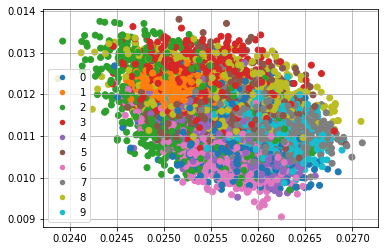

2022-07-18 22:59:55 | INFO | 
2022-07-18 22:59:55 | INFO | Finished epoch 1/100:
2022-07-18 22:59:55 | INFO | train:
2022-07-18 22:59:55 | INFO | seconds:  25.67 | batches: 389 | samples:  3.983e+05 | batch_rate:  15.16 [iter/sec] | sample_rate:  1.552e+04 [iter/sec] 
2022-07-18 22:59:55 | INFO | loss:        | avg: 356.8     | std: 3.55      | min: 347.8     | 25%: 354.3     | 50%: 356.8     | 75%: 359.1     | max: 366.6     
2022-07-18 22:59:55 | INFO | loss_reg:    | avg: 7.393     | std: 0.1917    | min: 6.991     | 25%: 7.239     | 50%: 7.424     | 75%: 7.563     | max: 7.719     
2022-07-18 22:59:55 | INFO | loss_dist:   | avg: 356.8     | std: 3.55      | min: 347.8     | 25%: 354.3     | 50%: 356.8     | 75%: 359.1     | max: 366.6     
2022-07-18 22:59:55 | INFO | loss_dist_top: | avg: 46.26     | std: 0.5497    | min: 44.8      | 25%: 45.89     | 50%: 46.25     | 75%: 46.61     | max: 47.92     
2022-07-18 22:59:55 | INFO | loss_dist_all: | avg: 310.5     | std: 3.355     | m

train:   4%|4         | 17/389 [00:00<?, ?it/s]

validation:   7%|7         | 28/389 [00:00<?, ?it/s]

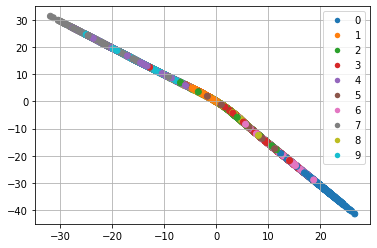

2022-07-18 23:00:34 | INFO | 
2022-07-18 23:00:34 | INFO | Finished epoch 2/100:
2022-07-18 23:00:34 | INFO | train:
2022-07-18 23:00:34 | INFO | seconds:  25.02 | batches: 389 | samples:  3.983e+05 | batch_rate:  15.55 [iter/sec] | sample_rate:  1.592e+04 [iter/sec] 
2022-07-18 23:00:34 | INFO | loss:        | avg: 307.5     | std: 85.21     | min: 137.8     | 25%: 233.4     | 50%: 355.2     | 75%: 358.4     | max: 453.1     
2022-07-18 23:00:34 | INFO | loss_reg:    | avg: 35.9      | std: 71.0      | min: 0.5632    | 25%: 6.083     | 50%: 6.678     | 75%: 57.43     | max: 1.016e+03 
2022-07-18 23:00:34 | INFO | loss_dist:   | avg: 307.5     | std: 85.21     | min: 137.8     | 25%: 233.4     | 50%: 355.2     | 75%: 358.4     | max: 453.1     
2022-07-18 23:00:34 | INFO | loss_dist_top: | avg: 50.65     | std: 19.49     | min: 34.45     | 25%: 46.01     | 50%: 46.49     | 75%: 47.47     | max: 393.5     
2022-07-18 23:00:34 | INFO | loss_dist_all: | avg: 256.9     | std: 91.69     | m

train:   4%|3         | 15/389 [00:00<?, ?it/s]

validation:   7%|7         | 28/389 [00:00<?, ?it/s]

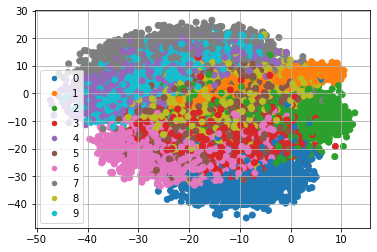

2022-07-18 23:01:14 | INFO | 
2022-07-18 23:01:14 | INFO | Finished epoch 3/100:
2022-07-18 23:01:14 | INFO | train:
2022-07-18 23:01:14 | INFO | seconds:  24.7 | batches: 389 | samples:  3.983e+05 | batch_rate:  15.75 [iter/sec] | sample_rate:  1.613e+04 [iter/sec] 
2022-07-18 23:01:14 | INFO | loss:        | avg: 98.01     | std: 16.83     | min: 84.62     | 25%: 89.02     | 50%: 91.33     | 75%: 95.17     | max: 150.0     
2022-07-18 23:01:14 | INFO | loss_reg:    | avg: 149.0     | std: 19.96     | min: 88.91     | 25%: 147.3     | 50%: 154.9     | 75%: 160.7     | max: 180.7     
2022-07-18 23:01:14 | INFO | loss_dist:   | avg: 98.01     | std: 16.83     | min: 84.62     | 25%: 89.02     | 50%: 91.33     | 75%: 95.17     | max: 150.0     
2022-07-18 23:01:14 | INFO | loss_dist_top: | avg: 48.89     | std: 4.134     | min: 42.36     | 25%: 46.23     | 50%: 47.75     | 75%: 50.21     | max: 66.25     
2022-07-18 23:01:14 | INFO | loss_dist_all: | avg: 49.11     | std: 13.42     | mi

train:   4%|4         | 16/389 [00:00<?, ?it/s]

In [ ]:
# path_to_data = '/home/shared/data//dataset/mnist'
# root_dir = '/home/shared/data/results'

path_to_data = '/localdata/elads/data/datasets/mnist'
root_dir = '/localdata/elads/data/resutls'

args = beam_arguments(get_deep_tsne_parser(),
    f"--project-name=deep_tsne_mnist --root-dir={root_dir} --identifier=topk_local_global_no_reg --algorithm=DeepTSNE --device=0 --batch-size=1024 --override",
    "--epoch-length=400000 --n-epochs=100 --reduction=mean --weight-decay=1e-5", path_to_data=path_to_data)

experiment = Experiment(args)
alg = experiment.fit(DeepTSNE, MNISTDataset)

In [4]:
# alg = alg.fit()

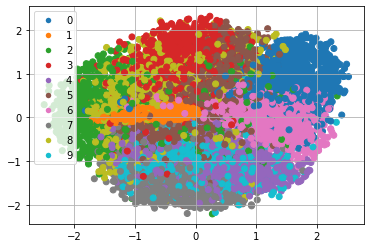

In [4]:
fig, ax = plt.subplots()
sc = ax.scatter(z[:, 0], z[:, 1], c=y, cmap='tab10')

size = 30
lp = lambda i: plt.plot([],color=sc.cmap(sc.norm(i)), ms=np.sqrt(size), mec="none",
                        label="{:g}".format(i), ls="", marker="o")[0]
handles = [lp(i) for i in np.arange(10)]
plt.legend(handles=handles)

ax.grid(True)

## TSNE

In [6]:
tsne = TSNE(n_components=2)

In [7]:
dataset = MNISTDataset(args)

In [12]:
x_test = dataset[dataset.indices_split['test']][1]['x']

In [15]:
x_test = x_test.view(len(x_test), -1).detach().cpu().numpy()

In [17]:
e = tsne.fit_transform(x_test)

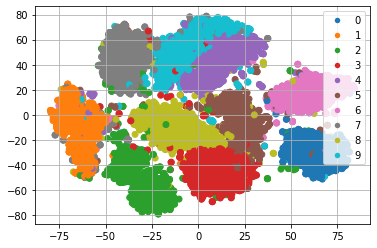

In [18]:
fig, ax = plt.subplots()
sc = ax.scatter(e[:, 0], e[:, 1], c=y, cmap='tab10')

size = 30
lp = lambda i: plt.plot([],color=sc.cmap(sc.norm(i)), ms=np.sqrt(size), mec="none",
                        label="{:g}".format(i), ls="", marker="o")[0]
handles = [lp(i) for i in np.arange(10)]
plt.legend(handles=handles)

ax.grid(True)

In [3]:
a = torch.randn(100, 100)

In [4]:
atk = torch.topk(a, 10, dim=-1, largest=False)

In [7]:
atk

torch.return_types.topk(
values=tensor([[-2.7338, -2.2758, -2.1701, -2.1654, -1.8648, -1.6150, -1.5310, -1.4882,
         -1.4721, -1.4583],
        [-2.0627, -1.8556, -1.7845, -1.6698, -1.6555, -1.5286, -1.5097, -1.4819,
         -1.4555, -1.3964],
        [-2.6504, -1.8372, -1.7253, -1.7076, -1.2716, -1.2167, -1.2085, -1.1432,
         -1.1298, -1.0775],
        [-2.1872, -2.0967, -2.0435, -2.0332, -1.9046, -1.8279, -1.8036, -1.7308,
         -1.7212, -1.6046],
        [-3.6176, -2.2882, -2.1055, -1.9543, -1.7401, -1.6991, -1.6895, -1.5702,
         -1.3165, -1.3148],
        [-2.5855, -1.8080, -1.7467, -1.6572, -1.6505, -1.4741, -1.3549, -1.3188,
         -1.3169, -1.2853],
        [-3.4579, -2.6421, -2.5695, -1.8793, -1.7043, -1.6966, -1.6510, -1.5316,
         -1.4108, -1.3400],
        [-2.1551, -2.1400, -2.1223, -2.0566, -2.0041, -1.8068, -1.7390, -1.7328,
         -1.6145, -1.5742],
        [-2.0091, -1.8997, -1.8781, -1.7321, -1.5585, -1.4734, -1.4341, -1.2211,
         -1.211